# Creación gráficos de artículo

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_hex
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


from matplotlib import cm, ticker
import os
from google.colab import files

# Carga de archivo de almacenamiento de gráficos
funciones1 = __import__('850_funcion1')

## Lectura de modelos

In [2]:
! unzip -q model_001.zip -d model_001/
! unzip -q model_002.zip -d model_002/

In [3]:
model_001 = tf.keras.models.load_model('model_001')
model_002 = tf.keras.models.load_model('model_002')

In [4]:
model_002.predict([[2000, 12, 2, 100]])

array([[0.62779135, 0.08413404]], dtype=float32)

## Simulaciones

In [5]:
def expand_grid(x, y, xval = 'x', yval = 'y'):
  """
  Función de expansión de malla
  """
  xG, yG = np.meshgrid(x, y) # Crear malla
  xG = xG.flatten() # Hacer malla 1D
  yG = yG.flatten() # Igual
  return pd.DataFrame({xval:xG, yval:yG})

def simularANN(variables, modelo, 
               orden = ['DD', 'II', 'Tinf', 'CLCR', 'MIC']):
  """
  Función de simulación de datos de acuerdo a una especificación de malla
  """
  dictArray  = [(i,k) for (i,k) in variables.items() if type(k) == np.ndarray]
  floatArray = [(i,k) for (i,k) in variables.items() if type(k) != np.ndarray]

  if len(dictArray) > 2:
    return
  
  sampleDF = expand_grid(dictArray[0][1], 
                        dictArray[1][1], 
                        xval = dictArray[0][0], 
                        yval = dictArray[1][0])

  for i in range(len(floatArray)):
    var, val = floatArray[i];
    sampleDF[var] = val

  sampleDF = sampleDF[orden]
  resultados = {'x': dictArray[0], 'y': dictArray[1], 'z': modelo.predict(sampleDF)}
  return resultados

In [6]:
objetoDict = {
  'MIC': 0,
  'DD': np.linspace(1500, 3000, 200),
  'II': 12,
  'Tinf': 2,
  'CLCR': np.linspace(90, 150, 200)
}

ANN_1 = simularANN(objetoDict, model_001)

In [7]:
objetoDict = {
  'DD': np.linspace(1500, 3000, 200),
  'II': 12,
  'Tinf': 2,
  'CLCR': np.linspace(90, 150, 200)
}

ANN_2 = simularANN(objetoDict, model_002, orden = ['DD', 'II', 'Tinf', 'CLCR'])

## Creación de gráficos

In [8]:
def crearGraficoMplt(data, x='x', y='y', z='z', ax = None, levels = [0.85], normalize_range=[0,1], colour_map = 'Spectral', n_levels=30, selected_output = 0):
  """
  Función de creación de mapa de contornos
  """
  if ax is None:
    ax = plt.gca()
  
  # Largo de dataframe (primera dimensión)
  shape1 = np.shape(data[z])
  
  n = np.sqrt(shape1[0]).astype(int)

  if shape1[1] == 1:
    grid_data = data[z].reshape((n,n))
  else:
    grid_data = data[z][:, selected_output].reshape((n,n))


  # Límites de normalización de escala de color
  normalize1 = Normalize(vmin = normalize_range[0], vmax = normalize_range[1], clip=True)
  # Crear malla bidimensional con datos
  x1, y1 = np.meshgrid(data[x][1], data[y][1])
  # Contornos
  main = ax.contourf(x1, y1, grid_data, n_levels, cmap=colour_map, norm = normalize1)
  csil = ax.contour(x1, y1, grid_data, levels=levels, linewidths=[1], linestyles=('--'), colors='black')
  ax.clabel(csil, inline=True, fontsize=10, fmt='%1.2f')

  return(ax)

In [9]:
objetoDict = {'MIC': np.linspace(-1,1, 2000), 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': 80}
ANN1d = simularANN(objetoDict, model_001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


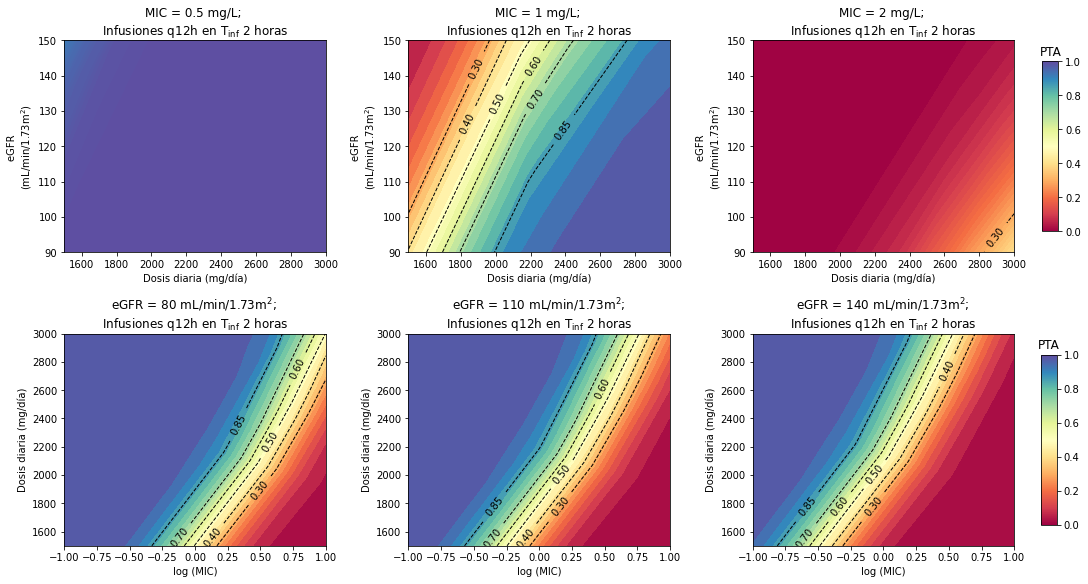

In [19]:
fig, ax = plt.subplots(2,3, figsize=(15, 8), constrained_layout=True,)

# Gráfico de PTA 1: AUC/MIC > 400 mg*h/L

objetoDict = {'MIC': -1, 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': np.linspace(90, 150, 200)}
ANN1a = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1a, ax = ax[0][0], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[0][0].set_title('MIC = 0.5 mg/L; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

objetoDict = {'MIC': 0, 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': np.linspace(90, 150, 200)}
ANN1b = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1b, ax = ax[0][1], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[0][1].set_title('MIC = 1 mg/L; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

objetoDict = {'MIC': 1, 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': np.linspace(90, 150, 200)}
ANN1c = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1c, ax = ax[0][2], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[0][2].set_title('MIC = 2 mg/L; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

[i.set_xlabel('Dosis diaria (mg/día)') for i in ax[0]];
[i.set_ylabel('eGFR \n(mL/min/1.73$\mathrm{m}^2$)') for i in ax[0]];

objetoDict = {'MIC': np.linspace(-1,1, 200), 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': 80}
ANN1d = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1d, ax = ax[1][0], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[1][0].set_title('eGFR = 80 $\mathrm{mL/min/1.73m^2}$; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

objetoDict = {'MIC': np.linspace(-1,1, 200), 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': 110}
ANN1d = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1d, ax = ax[1][1], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[1][1].set_title('eGFR = 110 $\mathrm{mL/min/1.73m^2}$; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

objetoDict = {'MIC': np.linspace(-1,1, 200), 'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': 140}
ANN1d = simularANN(objetoDict, model_001)
crearGraficoMplt(ANN1d, ax = ax[1][2], levels = [0.3,0.4,0.5,0.6,0.7,0.85]);
ax[1][2].set_title('eGFR = 140 $\mathrm{mL/min/1.73m^2}$; \nInfusiones q12h en $\mathrm{T_{inf}}$ 2 horas')
# ax[0].set_title('A.', fontfamily='serif', loc='left', fontsize=20, fontdict = {'verticalalignment':'bottom'})

[i.set_ylabel('Dosis diaria (mg/día)') for i in ax[1]];
[i.set_xlabel('log (MIC)') for i in ax[1]];

cbar1 = plt.colorbar(cm.ScalarMappable(cmap='Spectral'), ax = ax[0][2], shrink=0.8);
cbar1.ax.set_title('PTA');
cbar2 = plt.colorbar(cm.ScalarMappable(cmap='Spectral'), ax = ax[1][2], shrink=0.8);
cbar2.ax.set_title('PTA');
plt.show();
# funciones1.guardarMatplotlib(plt.gcf(), '210_superficiePTA_articulo_1.pdf', path=os.path.join('.')); #bbox_inches='tight'

In [11]:
# Gráfico de PTA 1: AUC/MIC > 400 mg*h/L

objetoDict = {'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 2, 'CLCR': np.linspace(90, 150, 200)}
ANN1a = simularANN(objetoDict, model_002, orden=['DD', 'II', 'Tinf', 'CLCR'])
objetoDict = {'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 6, 'CLCR': np.linspace(90, 150, 200)}
ANN1b = simularANN(objetoDict, model_002, orden=['DD', 'II', 'Tinf', 'CLCR'])
objetoDict = {'DD': np.linspace(1500, 3000, 200), 'II': 12, 'Tinf': 12, 'CLCR': np.linspace(90, 150, 200)}
ANN1c = simularANN(objetoDict, model_002, orden=['DD', 'II', 'Tinf', 'CLCR'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


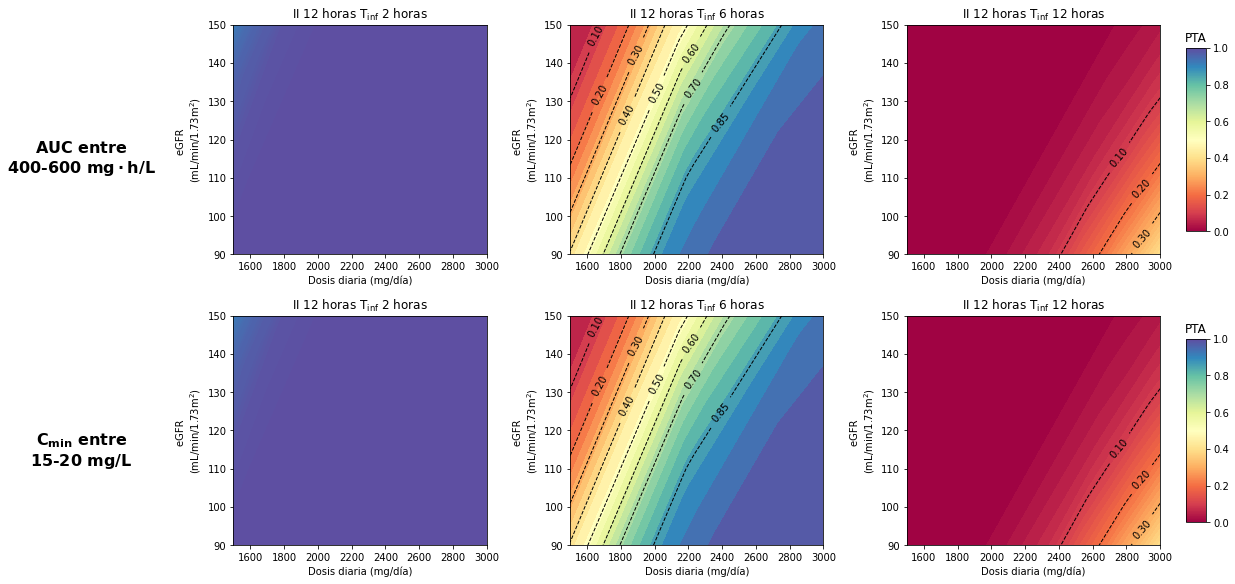

In [21]:
fig, ax = plt.subplots(2,3, figsize=(17, 8), constrained_layout=True,)

lvls = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85]

crearGraficoMplt(ANN1a, ax = ax[0][0], levels = lvls, selected_output=0);
ax[0][0].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 2 horas')

crearGraficoMplt(ANN1b, ax = ax[0][1], levels = lvls, selected_output=0);
ax[0][1].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 6 horas')

crearGraficoMplt(ANN1c, ax = ax[0][2], levels = lvls, selected_output=0);
ax[0][2].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 12 horas')

crearGraficoMplt(ANN1a, ax = ax[1][0], levels = lvls, selected_output=1);
ax[1][0].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 2 horas')

crearGraficoMplt(ANN1b, ax = ax[1][1], levels = lvls, selected_output=1);
ax[1][1].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 6 horas')

crearGraficoMplt(ANN1c, ax = ax[1][2], levels = lvls, selected_output=1);
ax[1][2].set_title('$\mathrm{II}$ 12 horas $\mathrm{T_{inf}}$ 12 horas')

[[i.set_xlabel('Dosis diaria (mg/día)') for i in ax[j]] for j in [0, 1]];
[[i.set_ylabel('eGFR \n(mL/min/1.73$\mathrm{m}^2$)') for i in ax[j]] for j in [0, 1]];

cbar1 = plt.colorbar(cm.ScalarMappable(cmap='Spectral'), ax = ax[0][2], shrink=0.8);
cbar1.ax.set_title('PTA');
cbar2 = plt.colorbar(cm.ScalarMappable(cmap='Spectral'), ax = ax[1][2], shrink=0.8);
cbar2.ax.set_title('PTA');

ax[0][0].text(-0.6, 0.5, "$\mathbf{AUC}$ entre \n400-600 $\mathbf{mg\cdot h/L}$", transform=ax[0][0].transAxes,fontsize=16, fontweight='bold', va='top', ha='center')
ax[1][0].text(-0.6, 0.5, "$\mathbf{C_{min}}$ entre \n15-20 $\mathbf{mg/L}$", transform=ax[1][0].transAxes,fontsize=16, fontweight='bold', va='top', ha='center')

plt.show();
# funciones1.guardarMatplotlib(plt.gcf(), '210_superficiePTA_articulo', path=os.path.join('.')); #bbox_inches='tight'

In [13]:
objetoDict = {'DD': 1500, 'II': 12, 'Tinf': np.linspace(1, 12, 200), 'CLCR': np.linspace(90, 150, 200)}
ANN1a = simularANN(objetoDict, model_002, orden=['DD', 'II', 'Tinf', 'CLCR'])

In [14]:
ANN1a

{'x': ('Tinf',
  array([ 1.        ,  1.05527638,  1.11055276,  1.16582915,  1.22110553,
          1.27638191,  1.33165829,  1.38693467,  1.44221106,  1.49748744,
          1.55276382,  1.6080402 ,  1.66331658,  1.71859296,  1.77386935,
          1.82914573,  1.88442211,  1.93969849,  1.99497487,  2.05025126,
          2.10552764,  2.16080402,  2.2160804 ,  2.27135678,  2.32663317,
          2.38190955,  2.43718593,  2.49246231,  2.54773869,  2.60301508,
          2.65829146,  2.71356784,  2.76884422,  2.8241206 ,  2.87939698,
          2.93467337,  2.98994975,  3.04522613,  3.10050251,  3.15577889,
          3.21105528,  3.26633166,  3.32160804,  3.37688442,  3.4321608 ,
          3.48743719,  3.54271357,  3.59798995,  3.65326633,  3.70854271,
          3.7638191 ,  3.81909548,  3.87437186,  3.92964824,  3.98492462,
          4.04020101,  4.09547739,  4.15075377,  4.20603015,  4.26130653,
          4.31658291,  4.3718593 ,  4.42713568,  4.48241206,  4.53768844,
          4.59296482,  